# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import datetime


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

   

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | west bay
Processing Record 3 of Set 1 | revda
Processing Record 4 of Set 1 | mablethorpe
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | ha
City not found. Skipping...
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | west island
Processing Record 10 of Set 1 | medina
Processing Record 11 of Set 1 | rongelap
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | isheyevka
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,3.60,US,1718806341
1,west bay,19.3667,-81.4167,30.03,80,97,6.86,KY,1718806341
2,revda,56.8010,59.9303,26.69,63,11,2.54,RU,1718806342
3,adamstown,-25.0660,-130.1015,22.24,86,100,10.12,PN,1718806342
4,waitangi,-43.9535,-176.5597,8.79,65,100,5.78,NZ,1718806342


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,3.60,US,1718806341
1,west bay,19.3667,-81.4167,30.03,80,97,6.86,KY,1718806341
2,revda,56.8010,59.9303,26.69,63,11,2.54,RU,1718806342
3,adamstown,-25.0660,-130.1015,22.24,86,100,10.12,PN,1718806342
4,waitangi,-43.9535,-176.5597,8.79,65,100,5.78,NZ,1718806342


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#Convert date for plot titles 
dates_df = city_data_df
dates_df['Date'] = pd.to_datetime(dates_df['Date'], unit='s').dt.strftime('%Y-%m-%d')
formatted_date = dates_df['Date'].iloc[0]

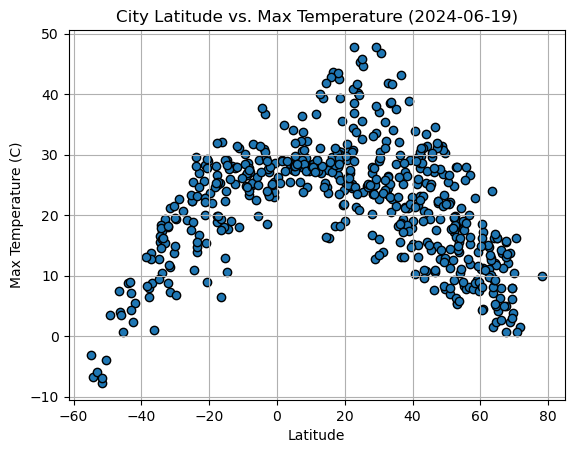

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

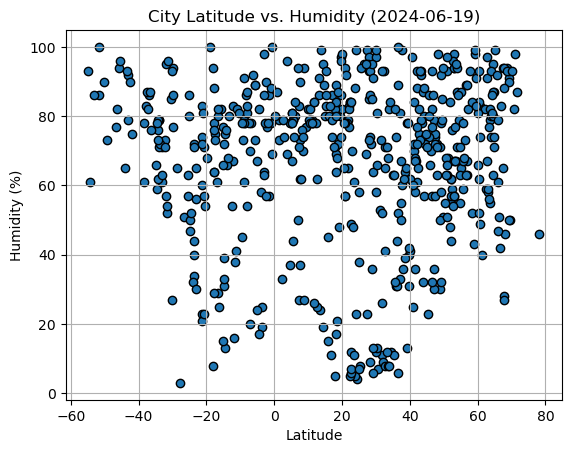

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker='o',edgecolors='black')


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

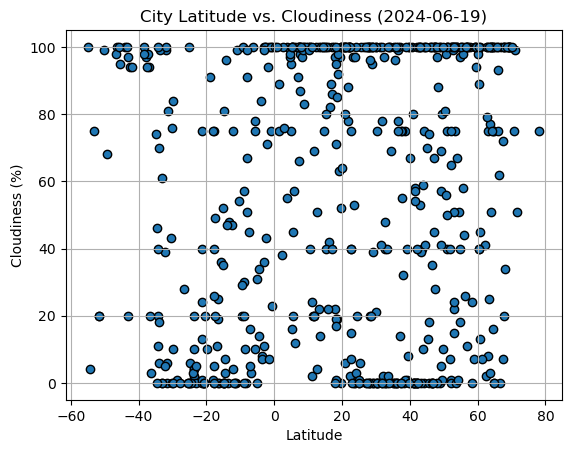

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

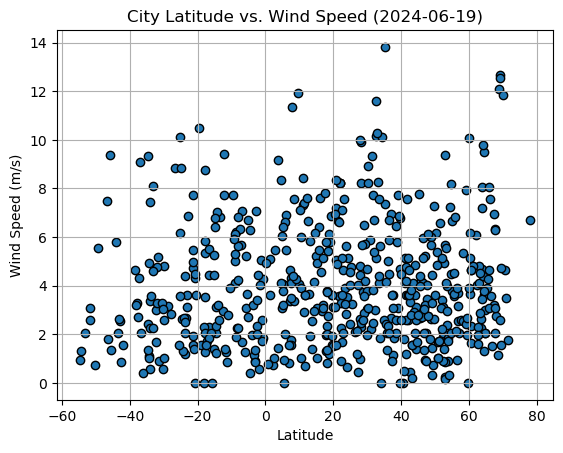

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker='o',edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # print r-value
    print(f"The r-value is: {rvalue**2:.4f}")

     # Determine hemisphere based on DataFrame for labels and title
    if x_values.mean() >= 0:
        hemi = "Northern Hemisphere:"
    else:
        hemi = "Southern Hemisphere:"
    
    # x-label, y-label, title
    y_label = y_values.name
    units = {'Max Temp': '(C)','Humidity': '(%)','Cloudiness': '(%)','Wind Speed': '(m/s)'}
    unit = units[y_label]
    y_label_with_unit = f"{y_label} {unit}"
    x_label = "Lattitude"
    title = f"{hemi} {y_label_with_unit} vs. {x_label} ({formatted_date})"
    #y_label_with_unit = f"{y_label} ({units.get(y_label, '')})"
    

    # Plot
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label_with_unit)

     # Calculate annotation position based on percentiles
    x_annotate = np.percentile(x_values, 90)
    y_annotate = np.percentile(y_values, 10)
    
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")

    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.73,97,100,3.60,US,2024-06-19
1,west bay,19.3667,-81.4167,30.03,80,97,6.86,KY,2024-06-19
2,revda,56.8010,59.9303,26.69,63,11,2.54,RU,2024-06-19
5,fortuna,40.5982,-124.1573,10.19,97,100,0.00,US,2024-06-19
7,medina,24.4686,39.6142,45.24,4,20,5.14,SA,2024-06-19


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,22.24,86,100,10.12,PN,2024-06-19
4,waitangi,-43.9535,-176.5597,8.79,65,100,5.78,NZ,2024-06-19
6,west island,-12.1568,96.8225,27.99,83,75,7.72,CC,2024-06-19
10,mount gambier,-37.8333,140.7667,6.49,83,97,3.29,AU,2024-06-19
12,port lincoln,-34.7333,135.8667,12.66,66,74,9.33,AU,2024-06-19


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4674


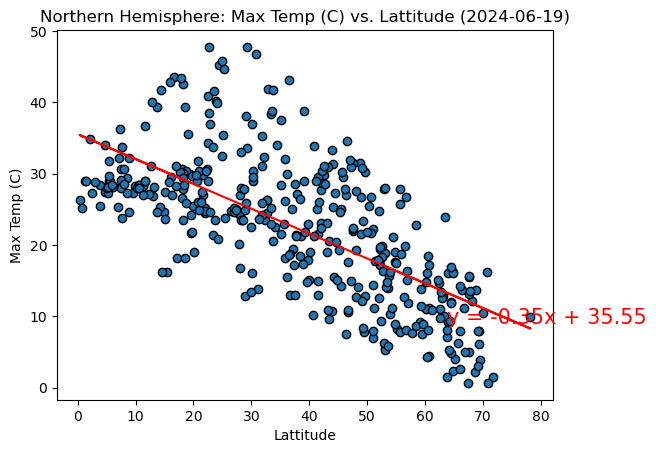

In [17]:
# Linear regression on Northern Hemisphere
plot_linear_regression(x_values=northern_hemi_df['Lat'],y_values=northern_hemi_df['Max Temp'])

The r-value is: 0.6783


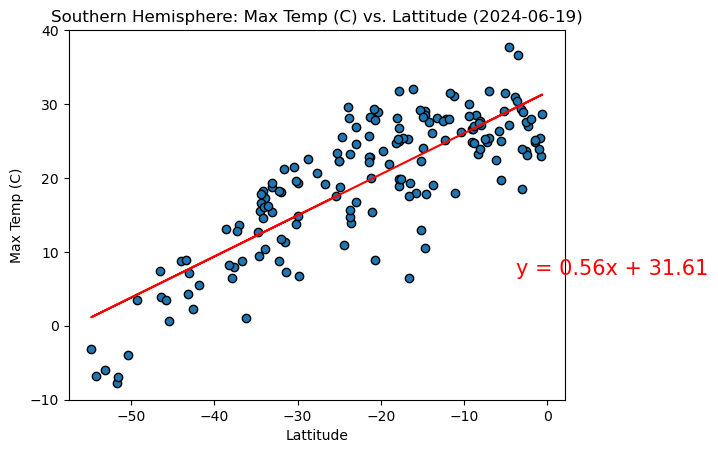

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(x_values=southern_hemi_df['Lat'],y_values=southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 
The regression equation for the Northern Hemisphere indicates that for every degree increase in latitude the maximum temperature decreases by ~0.35 degrees C. The r-value is 0.4674, a moderate negative correlation. This data suggests that the further north we move away from the equator, the max temperature usually decreases. 

This is further supported by the linear regression plot for the Southern Hemisphere. The r-value of 0.6783 indicates a strong positive correlation between temperature and and latitude. The closer we move towards the equator the warmer the temperature tends to be. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0078


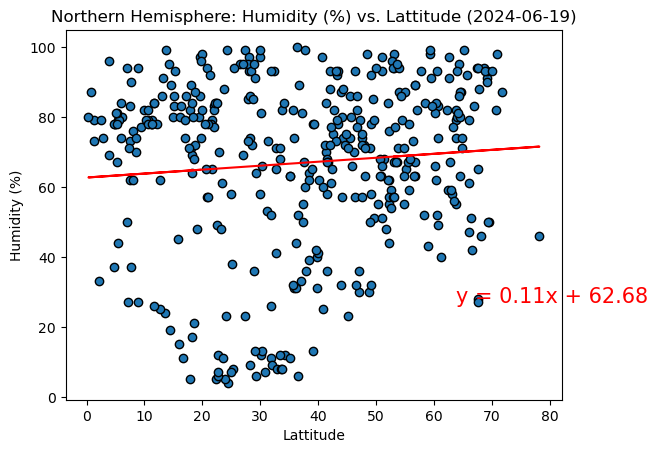

In [19]:
# Northern Hemisphere
plot_linear_regression(x_values=northern_hemi_df['Lat'],y_values=northern_hemi_df['Humidity'])

The r-value is: 0.0362


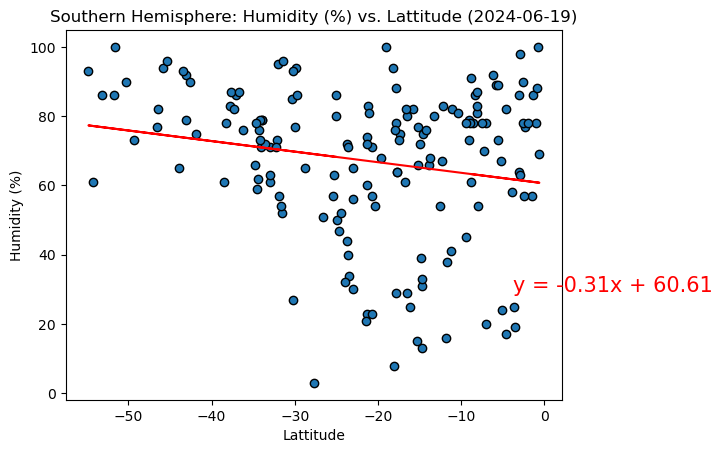

In [20]:
# Southern Hemisphere
plot_linear_regression(x_values=southern_hemi_df['Lat'],y_values=southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** Both linear regression plots for the relationship between latitude and humidity have a slope close to zero. The r-value for the Northern Hemisphere is 0.0078  and the r-value for the Southern Hemisphere is 0.0362, indicating a very weak correlation between humidity and latitude. This is further supported by the high variance in humidity for different latitudes shown on the plot. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0006


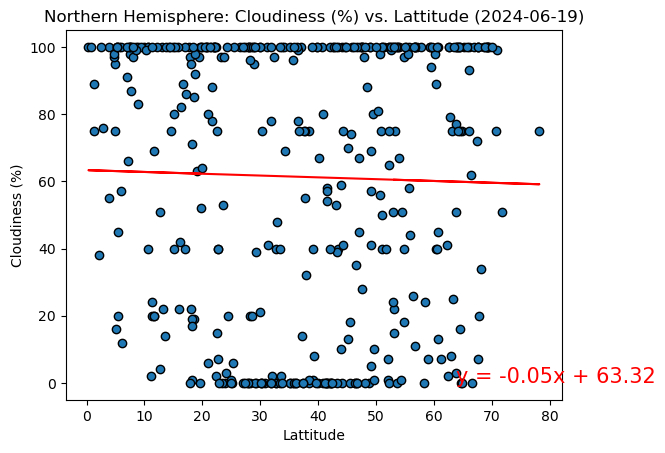

In [21]:
# Northern Hemisphere
plot_linear_regression(x_values=northern_hemi_df['Lat'],y_values=northern_hemi_df['Cloudiness'])

The r-value is: 0.0188


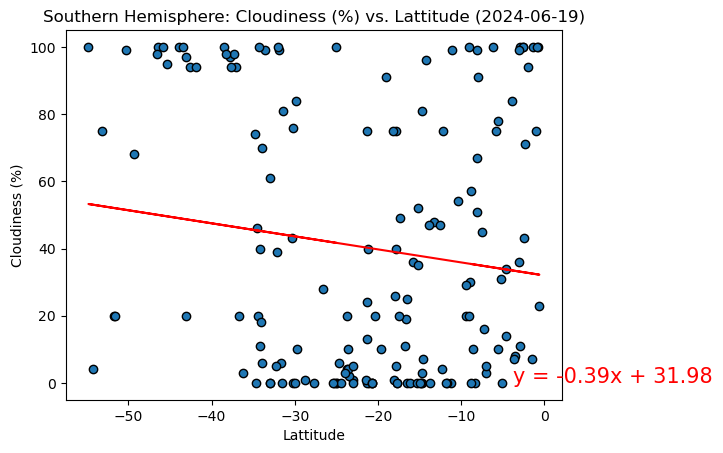

In [22]:
# Southern Hemisphere
plot_linear_regression(x_values=southern_hemi_df['Lat'],y_values=southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** The plots for the Cloudiness vs. Lattitude do not show any significat relationship between the two. The r-value for the Northern Hemisphere is 0.0006 indicating no relationship between the two. The Southern Hemisphere has r-value 0.0188, a very weak correlation. This data suggests that cloudiness is influenced by other factors far more than it is by latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0010


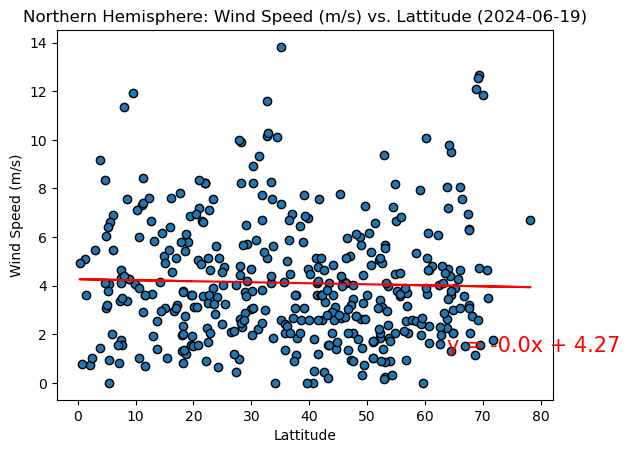

In [23]:
# Northern Hemisphere
plot_linear_regression(x_values=northern_hemi_df['Lat'],y_values=northern_hemi_df['Wind Speed'])

The r-value is: 0.0032


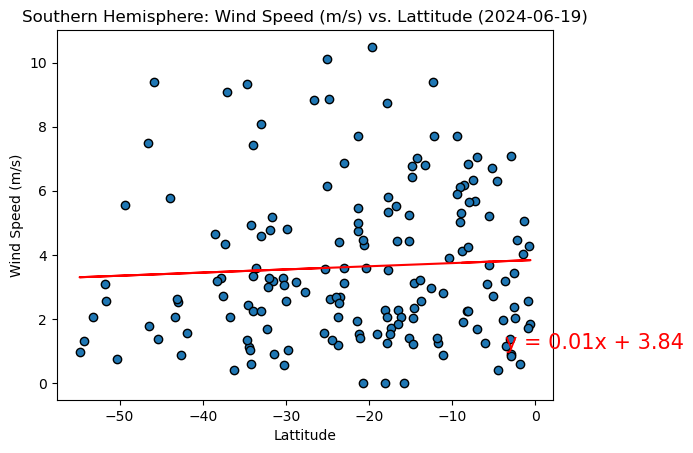

In [24]:
# Southern Hemisphere
plot_linear_regression(x_values=southern_hemi_df['Lat'],y_values=southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** The linear regression plots for Wind Speed vs. Latitude also show little to no correlation between the two. For the Northern Hemisphere, the wind speed stayed relatively the same across all latitudes, while the Southern Hemisphere plot shows a slight increase in wind speed the closer to the equator that we move. 